[![PracticeProbs](https://d33wubrfki0l68.cloudfront.net/b6800cc830e3fd5a3a4c3d9cfb1137e6a4c15c77/ec467/assets/images/transparent-1.png)](https://www.practiceprobs.com/)

# [Prime Locations](https://www.practiceprobs.com/problemsets/python-numpy/advanced/prime-locations/)

Given a 10x10x10 array of zeros, set (i,j,k) = 1 if i is odd, j is even, and k is prime.

In other words, set these elements to 1: (1,0,2), (1,0,3), (1,0,5), (1,0,7), (1,2,2), ...

In [75]:
import numpy as np
chewy = np.zeros((10,10,10))

print(chewy[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---

In [76]:
np.set_printoptions(linewidth=200)
# for sanity checks and guiding visuals - could insert is_even, is_prime functions inline
# instead will aim to vectorize below
# idx_labels = np.array([["text"] * 10 ] * 10, dtype=object)
idx_labels = np.full((10,10,10),"text", dtype=object)
for i in range(10):
    for j in range(10):
        for k in range(10):
            idx_labels[i,j,k] = f"i{i}j{j}k{k}"
# or         
# idx_labels = np.array([[f"i{i}j{j}" for j in range(10)] for i in range(10)], dtype=object)
# readable? pythonic? which is best ...
print(idx_labels[:2])

[[['i0j0k0' 'i0j0k1' 'i0j0k2' 'i0j0k3' 'i0j0k4' 'i0j0k5' 'i0j0k6' 'i0j0k7' 'i0j0k8' 'i0j0k9']
  ['i0j1k0' 'i0j1k1' 'i0j1k2' 'i0j1k3' 'i0j1k4' 'i0j1k5' 'i0j1k6' 'i0j1k7' 'i0j1k8' 'i0j1k9']
  ['i0j2k0' 'i0j2k1' 'i0j2k2' 'i0j2k3' 'i0j2k4' 'i0j2k5' 'i0j2k6' 'i0j2k7' 'i0j2k8' 'i0j2k9']
  ['i0j3k0' 'i0j3k1' 'i0j3k2' 'i0j3k3' 'i0j3k4' 'i0j3k5' 'i0j3k6' 'i0j3k7' 'i0j3k8' 'i0j3k9']
  ['i0j4k0' 'i0j4k1' 'i0j4k2' 'i0j4k3' 'i0j4k4' 'i0j4k5' 'i0j4k6' 'i0j4k7' 'i0j4k8' 'i0j4k9']
  ['i0j5k0' 'i0j5k1' 'i0j5k2' 'i0j5k3' 'i0j5k4' 'i0j5k5' 'i0j5k6' 'i0j5k7' 'i0j5k8' 'i0j5k9']
  ['i0j6k0' 'i0j6k1' 'i0j6k2' 'i0j6k3' 'i0j6k4' 'i0j6k5' 'i0j6k6' 'i0j6k7' 'i0j6k8' 'i0j6k9']
  ['i0j7k0' 'i0j7k1' 'i0j7k2' 'i0j7k3' 'i0j7k4' 'i0j7k5' 'i0j7k6' 'i0j7k7' 'i0j7k8' 'i0j7k9']
  ['i0j8k0' 'i0j8k1' 'i0j8k2' 'i0j8k3' 'i0j8k4' 'i0j8k5' 'i0j8k6' 'i0j8k7' 'i0j8k8' 'i0j8k9']
  ['i0j9k0' 'i0j9k1' 'i0j9k2' 'i0j9k3' 'i0j9k4' 'i0j9k5' 'i0j9k6' 'i0j9k7' 'i0j9k8' 'i0j9k9']]

 [['i1j0k0' 'i1j0k1' 'i1j0k2' 'i1j0k3' 'i1j0k4' 'i1j0k5' '

In [77]:
def is_even(n):
    if n % 2 == 0:
        return True
    return False
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

v_prime = np.vectorize(is_prime)
v_even = np.vectorize(is_even)

In [74]:
idxs = np.arange(10)
ieven = np.broadcast_to( (v_even(idxs) * 1), (10,10,10) ).transpose(2,1,0)
# print(ieven)
jodd = np.broadcast_to( (~v_even(idxs) * 1), (10,10,10) ).transpose(1,2,0)
# print(jodd)
kprime = np.broadcast_to( (v_prime(idxs) * 1), (10,10,10) )#.transpose(2,1,0)
# print(kprime)

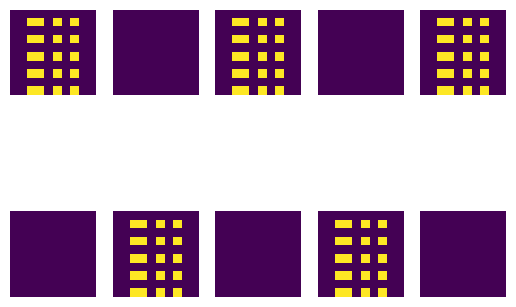

In [95]:
chewy = ieven * jodd * kprime
# print(chewy)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,5)
for r in range(2):
    for c in range(5):
        axs[r,c].imshow(chewy[r*5+c])
        axs[r,c].axis('off')

## [See our solution!](https://www.practiceprobs.com/problemsets/python-numpy/advanced/prime-locations/solution/)